In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
num_puntos = 2000
conjunto_puntos = []
for i in xrange(num_puntos):
    if np.random.random() < 0.5:
        conjunto_puntos.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else:
        conjunto_puntos.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])
        

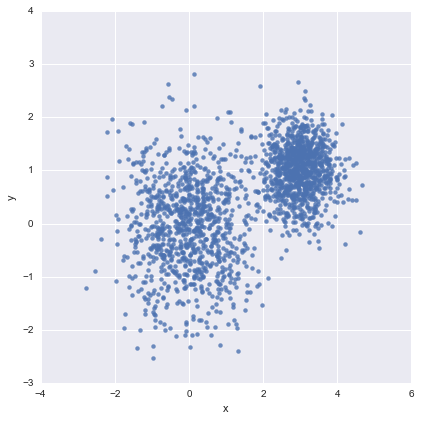

In [3]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({"x": [v[0] for v in conjunto_puntos],
                  "y": [v[1] for v in conjunto_puntos]})

sns.lmplot("x", "y", data = df, fit_reg=False, size = 6)

In [4]:
vectors = tf.constant(conjunto_puntos)
k = 2
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))

print vectors.get_shape()
print centroides.get_shape()



(2000, 2)
(2, 2)


In [5]:

expanded_vectors = tf.expand_dims(vectors, 0) 
#above we expanded the dimension along the first dim
expanded_centroides = tf.expand_dims(centroides, 1)
#here we expanded along the 2nd dimension

#since the centroides are a different dimensional tensor from the data
#we need to expand the tensors along on dimension to allow tensorflow to do manipulations of the two

print expanded_vectors.get_shape()
print expanded_centroides.get_shape()


(1, 2000, 2)
(2, 1, 2)


In [6]:
#as we can see the dimensions were not assigned yet

diff = tf.sub(expanded_vectors, expanded_centroides)

#really interesting, it knows to take the difference between 
#each of the four centroides with all of the other tensors

sqr = tf.square(diff)
#now we need to sum the square difference accross each centroid
#the 2 indicates we want to preserve the y and x components (last dimension)
#but otherwise we are minimizing the total sum
distances = tf.reduce_sum(sqr, 2) 
assignments = tf.argmin(distances, 0)
#this gives us the smallest distance centroid for each of the 2000 data points. 


In [7]:

#simplified version of code, comment out to run

#assignments = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroides)), 2), 0)

means = tf.concat(0, 
                  [tf.reduce_mean(
            tf.gather(
                vectors, tf.reshape(
                    tf.where( 
                        tf.equal(assignments, c)),[1,-1])),
            reduction_indices=[1]) for c in xrange(k)])

update_centroides = tf.assign(centroides, means)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)


In [ ]:

for step in xrange(100):
   _, centroid_values, assignment_values = sess.run([centroides, update_centroides, assignments])

print sess.run([update_centroides, centroides, assignments])

data = {"x": [], "y": [], "cluster": []}

for i in xrange(len(assignment_values)):
  data["x"].append(conjunto_puntos[i][0])
  data["y"].append(conjunto_puntos[i][1])
  data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)
plt.show()